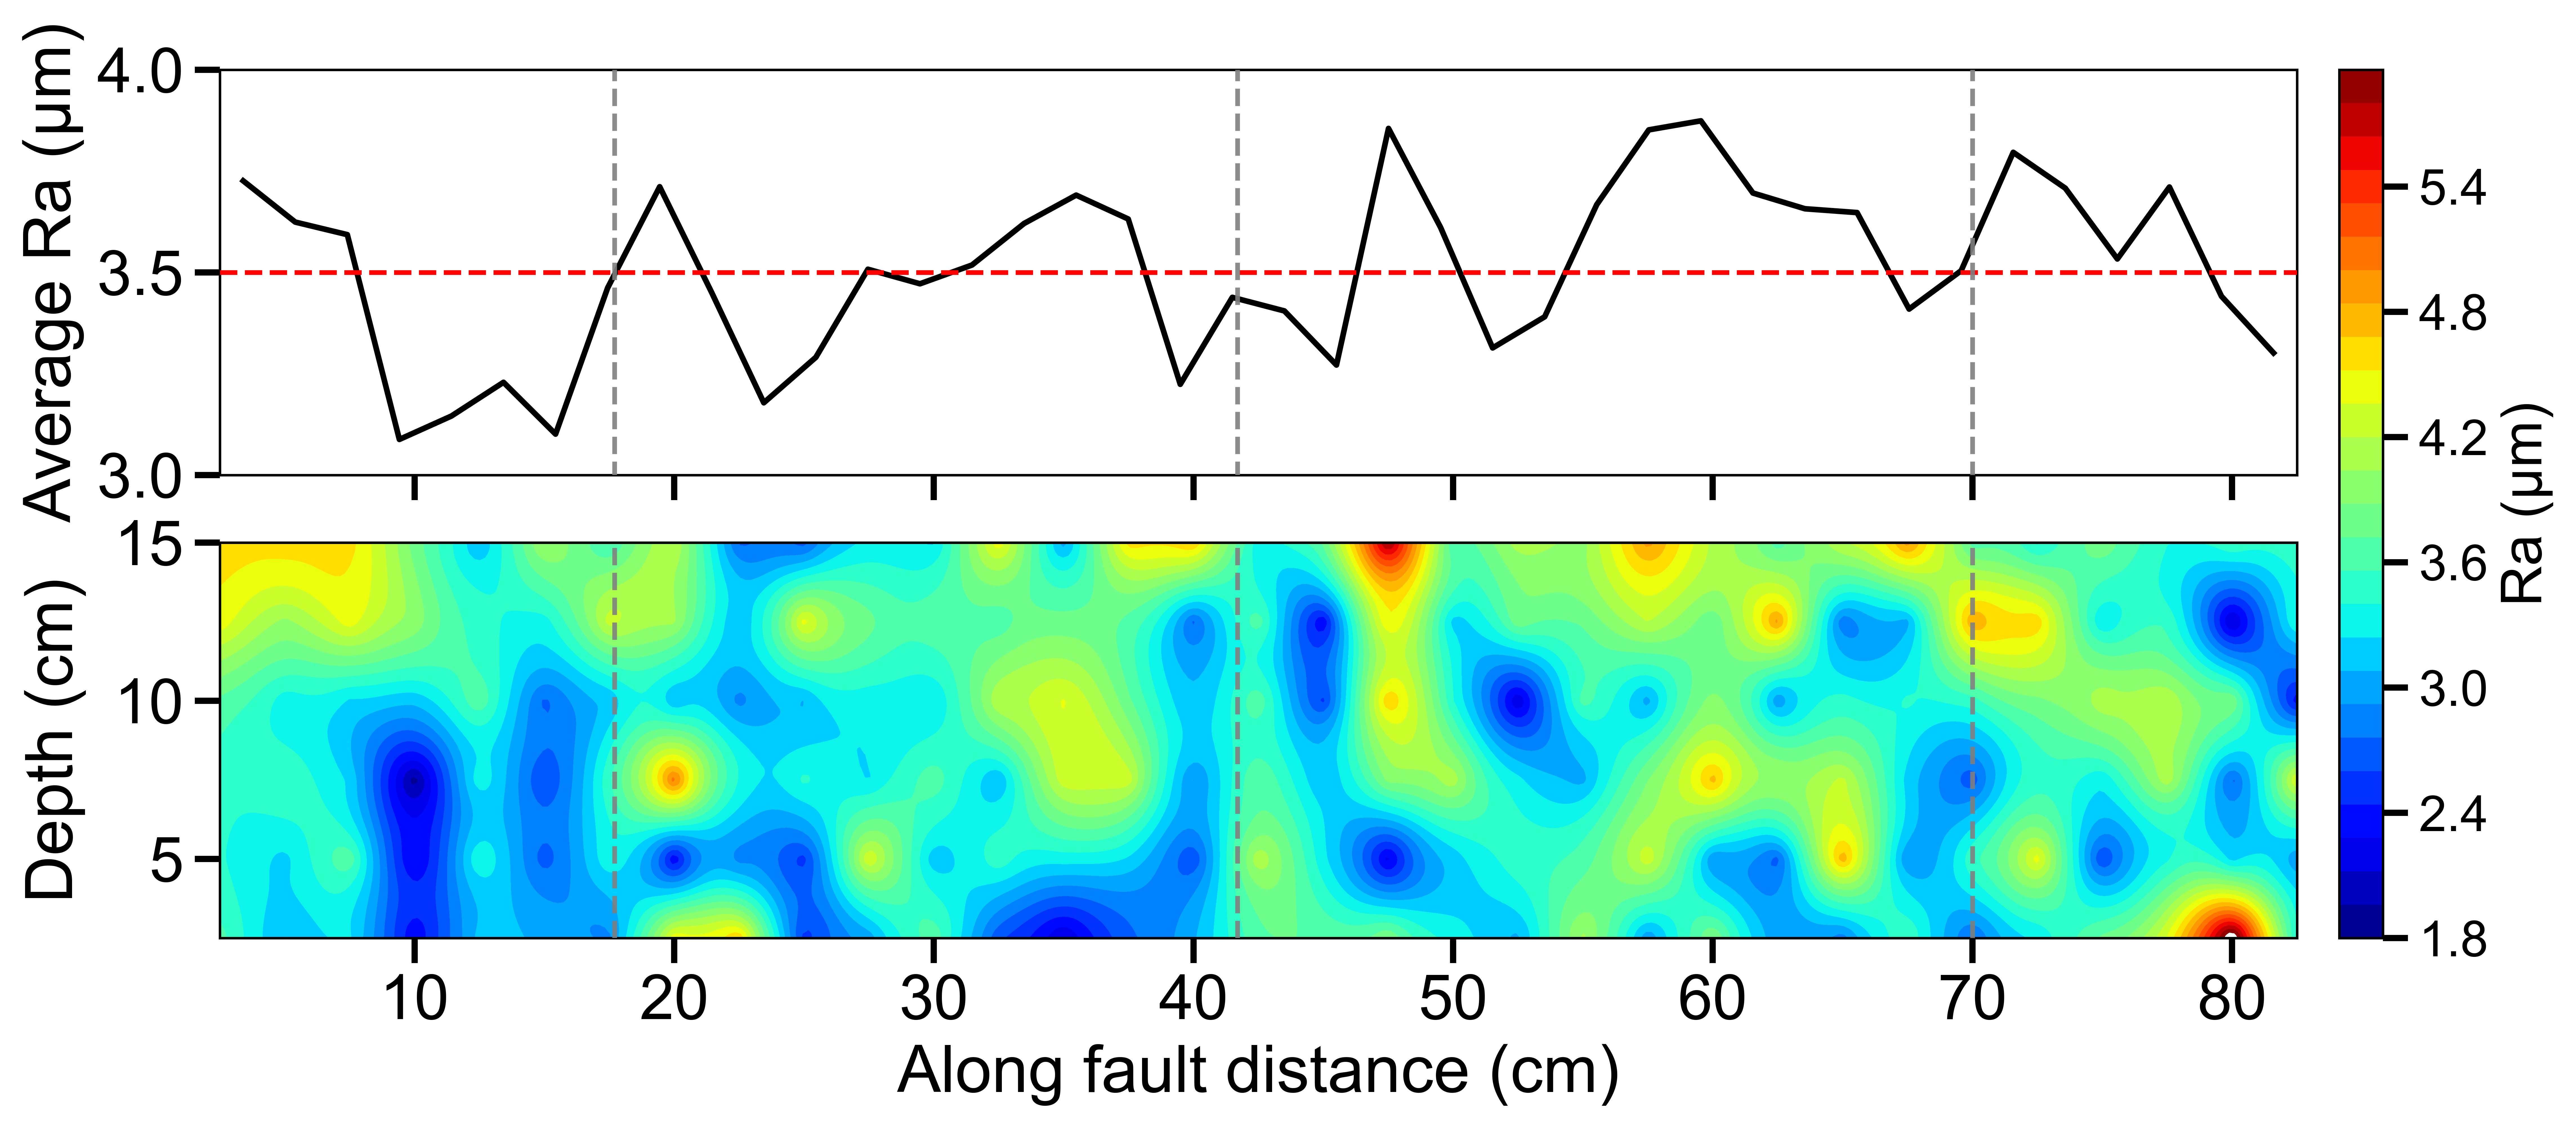

In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import os
import csv
import matplotlib.gridspec as gridspec 
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d
from matplotlib.pyplot import MultipleLocator 
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.major.size']  = 8
plt.rcParams['xtick.minor.size']  = 4
plt.rcParams['ytick.major.size']  = 8
plt.rcParams['ytick.minor.size']  = 4

## roughness after interpolation, 400, 
data=sio.loadmat("roughness.mat")["data"]
xx=data[:,0].reshape(400,400)
yy=data[:,1].reshape(400,400)
zz=data[:,2].reshape(400,400)

x1=xx
y1=yy
z1=zz

## calculate the average roughness along the fault
toto = []
x1s=[]
n=10
for i in range(z1.shape[1]//n):
    mean = z1[:,(i)*n:(i+1)*n]
    x11 = x1[0,(i)*n:(i+1)*n]
    x_mean = np.mean(x11)
    means = np.mean(mean)
    toto.append(means)
    x1s.append(x_mean)
# plt.plot(x1s,toto)

### roughness
levels= np.arange(1.8,6.0, 0.16)
fig, ax = plt.subplots(1, 1, figsize=(20,5), dpi=800)
scat=ax.contourf(x1, y1, z1, levels, cmap="jet")
ax.tick_params(axis='both', labelsize=20)
ax.set_xlabel("Along fault distance (cm)", fontsize=21)
ax.set_ylabel("Depth (cm)", fontsize=21, labelpad=9)
cb = fig.colorbar(scat,fraction=0.5,  pad=0.01)
cb.ax.yaxis.set_major_locator(MultipleLocator(0.6))
cb.set_label('Ra (μm)',fontsize=18)
cb.ax.tick_params(labelsize=16)
ax.set_xlim([2.5, 82.5])

### divide, four fault segments P0,P1,P2,P3
ax.plot([17.7,17.7],[2.5,15],c='gray',ls='--',alpha=0.9, zorder=5)
ax.plot([41.7,41.7],[2.5,15],c='gray',ls='--',alpha=0.9, zorder=5)
ax.plot([70,70],[2.5,15],c='gray',ls='--',alpha=0.9, zorder=5)

### average roughness
divider = make_axes_locatable(ax)
ax_histx = divider.append_axes("top", 1.8, pad=0.3, sharex=ax)
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histx.tick_params(axis='both', labelsize=20)
ax_histx.set_ylabel("Average Ra (μm)", fontsize=21)
ax_histx.plot(x1s,toto, "-", c='k', lw=1.8)
ax_histx.plot([2.5,82.5],[3.5,3.5],c='r',ls='--',alpha=1.0, zorder=5)
ax_histx.set_ylim([3, 4])
ax_histx.yaxis.set_major_locator(MultipleLocator(0.5))

ax_histx.plot([17.7,17.7],[2.5,15],c='gray',ls='--',alpha=0.9, zorder=5)
ax_histx.plot([41.7,41.7],[2.5,15],c='gray',ls='--',alpha=0.9, zorder=5)
ax_histx.plot([70,70],[2.5,15],c='gray',ls='--',alpha=0.9, zorder=5)

plt.tight_layout()
# plt.savefig("roughness.png", dpi=800)